# Visualizing FordGoBike Data
## by Mahmoud Ali Elbasiony

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


### data were downloaded from kaggle website link: https://www.kaggle.com/keerthanamanoharan/ford-gobike-tripdata-2018


In [128]:
# load in the dataset into a pandas dataframe, print statistics
file_path='fordgobike_tripdata.csv'
df = pd.read_csv(file_path)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [129]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:

In [130]:
# Let's take a peak into the data's basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [131]:
# Let's also get some additional description for stats figures
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [132]:
# Any duplicates?
df.duplicated().sum()
# No duplicates here - that was straightforward

0

In [133]:
# What about NaN values?
df.isna().sum()
# It looks like some of the starting and ending values are NaN, along with member birth years and genders

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned (from left to right):
- There are missing values throughout the dataset (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
- Start/end times are not in the timestamp format
- The following columns are not in object format: 
  - start_station_id
  - end_station_id
  - bike_id
- Member birth is in the float format, but should be converted to integer format
- Member birthdates have a few inaccurate values



In [134]:
df_cleaned=df.copy()

##### Define: Missing values - I will hold on cleaning these up until later. It may or may not present an issue. 
##### Code:


In [135]:
#remove Missing values
df_cleaned=df_cleaned.dropna()

##### Define: Converting several of the columns to the appropriate data type:
- Starting and ending times to the timestamp format
- User type, gender, and bike share for all to category format
- Bike ID, start station ID, and end station ID to object format

In [136]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [137]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')
df_cleaned.bike_share_for_all_trip = df_cleaned.bike_share_for_all_trip.astype('category')


In [138]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(int).astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(int).astype(str)

In [139]:
# Changing the format to int
df_cleaned.member_birth_year = df_cleaned.member_birth_year.astype('int64')

#### Define: add member age column.
#### Code:


In [140]:
df_cleaned['member_age'] = 2021-df_cleaned.member_birth_year

##### Test:

In [141]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,35
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,25
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No,30
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,33
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,41


In [142]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        int64         
 14  member_gender            category      
 15  bike_share_for_all_trip  category      
 16  member_age               int64         
dtypes: category(3), datetime64[

##### Define: Clean up the ages of members - there are a few outliers that don't make sense. Since 99% of users are ages 66 and below, I will just keep that proportion of users by keeping users 66 and below
##### Code: see below

In [143]:
# The average age is 38 years old
df_cleaned.member_age.mean()

37.93921068286061

In [144]:
df_cleaned.describe()
#there some irregularity in member ages max age observed is 140 years old which is impossible

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06
mean,7.728624e+02,3.776877e+01,-1.223511e+02,3.776887e+01,-1.223506e+02,1.983061e+03,3.793921e+01
std,1.943048e+03,1.015663e-01,1.193663e-01,1.014133e-01,1.187729e-01,1.045133e+01,1.045133e+01
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.881000e+03,2.100000e+01
25%,3.440000e+02,3.777106e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.978000e+03,3.000000e+01
50%,5.430000e+02,3.778107e+01,-1.223971e+02,3.778127e+01,-1.223959e+02,1.985000e+03,3.600000e+01
75%,8.390000e+02,3.779728e+01,-1.222876e+02,3.779728e+01,-1.222894e+02,1.991000e+03,4.300000e+01
max,8.628100e+04,3.788022e+01,-1.218333e+02,3.788022e+01,-1.218333e+02,2.000000e+03,1.400000e+02


In [145]:
df_cleaned.member_age.describe(percentiles=[.75,.80,.95,.99]).astype('int64')
#there are 99% of users are under the age of 68

count    1741556
mean          37
std           10
min           21
50%           36
75%           43
80%           46
95%           59
99%           68
max          140
Name: member_age, dtype: int64

In [146]:
df_cleaned.query("member_age<=68").describe()


,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06
mean,7.731038e+02,3.776858e+01,-1.223511e+02,3.776868e+01,-1.223506e+02,1.983431e+03,3.756944e+01
std,1.945196e+03,1.018145e-01,1.195945e-01,1.016607e-01,1.189998e-01,9.706350e+00,9.706350e+00
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.953000e+03,2.100000e+01
25%,3.450000e+02,3.777106e+01,-1.224116e+02,3.777106e+01,-1.224094e+02,1.978000e+03,3.000000e+01
50%,5.430000e+02,3.778107e+01,-1.223974e+02,3.778127e+01,-1.223971e+02,1.986000e+03,3.500000e+01
75%,8.390000e+02,3.779728e+01,-1.222880e+02,3.779728e+01,-1.222894e+02,1.991000e+03,4.300000e+01
max,8.628100e+04,3.788022e+01,-1.218333e+02,3.788022e+01,-1.218333e+02,2.000000e+03,6.800000e+01


In [147]:
# i will keep the indexes where riders were under 68 years of age
df_cleaned = df_cleaned.query('member_age <= 68')

In [148]:
df_cleaned.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06
mean,7.731038e+02,3.776858e+01,-1.223511e+02,3.776868e+01,-1.223506e+02,1.983431e+03,3.756944e+01
std,1.945196e+03,1.018145e-01,1.195945e-01,1.016607e-01,1.189998e-01,9.706350e+00,9.706350e+00
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.953000e+03,2.100000e+01
25%,3.450000e+02,3.777106e+01,-1.224116e+02,3.777106e+01,-1.224094e+02,1.978000e+03,3.000000e+01
50%,5.430000e+02,3.778107e+01,-1.223974e+02,3.778127e+01,-1.223971e+02,1.986000e+03,3.500000e+01
75%,8.390000e+02,3.779728e+01,-1.222880e+02,3.779728e+01,-1.222894e+02,1.991000e+03,4.300000e+01
max,8.628100e+04,3.788022e+01,-1.218333e+02,3.788022e+01,-1.218333e+02,2.000000e+03,6.800000e+01


#### When are most trips taken in terms of time of day, day of the week, or month of the year?

##### Define: make new attributes of time day, day of the week, or month of the year for start_time and end_time
##### Code: see below

In [149]:
# Start time month (January - December)
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.month_name()
# end time month (January - December)
df_cleaned['end_time_month'] = df_cleaned['end_time'].dt.month_name()
# Start time month (1 - 12)
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month
# end time month (1 - 12)
df_cleaned['end_time_month_num'] = df_cleaned['end_time'].dt.month

In [150]:
# Start time day (sat - fri)
df_cleaned['start_time_day'] = df_cleaned['start_time'].dt.day_name()
# end time month (sat - fri)
df_cleaned['end_time_day'] = df_cleaned['end_time'].dt.day_name()
# Start time month (1 - 7)
df_cleaned['start_time_day_num'] = df_cleaned['start_time'].dt.dayofweek
# end time month (1 - 7)
df_cleaned['end_time_day_num'] = df_cleaned['end_time'].dt.dayofweek

In [151]:
#add duration_min
df_cleaned['duration_min']=df_cleaned.duration_sec/60
df_cleaned['duration_min']=df_cleaned['duration_min'].astype(int)

In [152]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_age,start_time_month,end_time_month,start_time_month_num,end_time_month_num,start_time_day,end_time_day,start_time_day_num,end_time_day_num,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,35,January,February,1,2,Wednesday,Thursday,2,3,1254
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,25,January,February,1,2,Wednesday,Thursday,2,3,1192
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,30,January,February,1,2,Wednesday,Thursday,2,3,666
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,33,January,February,1,2,Wednesday,Thursday,2,3,7
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,41,January,January,1,1,Wednesday,Wednesday,2,2,3


In [153]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725138 entries, 0 to 1863719
Data columns (total 26 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        int64         
 14  member_gender            category      
 15  bike_share_for_all_trip  category      
 16  member_age               int64         
 17  start_time_month         ob

In [154]:
df_cleaned.start_time_month.value_counts()

October      190045
July         182152
June         179767
August       176839
September    173532
May          165687
November     127407
December     125064
April        120595
March        101185
February      97284
January       85581
Name: start_time_month, dtype: int64

In [155]:
df_cleaned.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month_num,end_time_month_num,start_time_day_num,end_time_day_num,duration_min
count,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06,1.725138e+06
mean,7.731038e+02,3.776858e+01,-1.223511e+02,3.776868e+01,-1.223506e+02,1.983431e+03,3.756944e+01,6.971836e+00,6.971832e+00,2.564475e+00,2.565174e+00,1.239355e+01
std,1.945196e+03,1.018145e-01,1.195945e-01,1.016607e-01,1.189998e-01,9.706350e+00,9.706350e+00,3.121095e+00,3.121119e+00,1.823714e+00,1.824279e+00,3.242109e+01
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.953000e+03,2.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.450000e+02,3.777106e+01,-1.224116e+02,3.777106e+01,-1.224094e+02,1.978000e+03,3.000000e+01,5.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
50%,5.430000e+02,3.778107e+01,-1.223974e+02,3.778127e+01,-1.223971e+02,1.986000e+03,3.500000e+01,7.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
75%,8.390000e+02,3.779728e+01,-1.222880e+02,3.779728e+01,-1.222894e+02,1.991000e+03,4.300000e+01,1.000000e+01,1.000000e+01,4.000000e+00,4.000000e+00,1.300000e+01
max,8.628100e+04,3.788022e+01,-1.218333e+02,3.788022e+01,-1.218333e+02,2.000000e+03,6.800000e+01,1.200000e+01,1.200000e+01,6.000000e+00,6.000000e+00,1.438000e+03


In [156]:
#save cleaned version to desk
df_cleaned.to_csv("df_cleaned.csv")

### What is the structure of your dataset?

> There are 183412 trips in the dataset with 16 features

> The column header descriptions are as follows (each trip is anonymized):
- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    - Member Year of Birth
    - Member Gender
    
> I added the following columns in my cleaning efforts:
- Member Age	
- Start Time Month	
- end Time Month	
- Start Time Month Number	
- end Time Month Number
- Start Time Day of the Week
- end Time Day of the Week etc..




### What is/are the main feature(s) of interest in your dataset?

> The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also sample data related to the users of the bike service including their age, gender, and whether they are a paying member or a casual user. These features can be used to make business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information will be utilized heavily. I will use the customer related data.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
inclset_styleMarkdown cell with comments about what you observed, and what
you plan on investigating next.

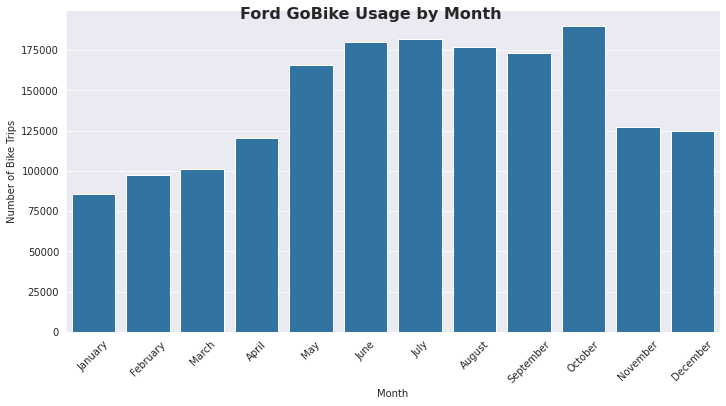

In [158]:
# Monthly usage of the Ford Go Bike system
color = sb.color_palette()[0]
sb.set_style("darkgrid")
plot_01 = sb.catplot(data = df_cleaned,kind='count', x = 'start_time_month',color=color,aspect=2);

plot_01.set_ylabels('Number of Bike Trips')
plot_01.set_xlabels('Month')
plot_01.fig.suptitle('Ford GoBike Usage by Month', fontsize = 16, fontweight = 'bold',y=1.05);

plot_01.set_xticklabels(rotation=45);

##### Observation 1: Not surprisingly, the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.  

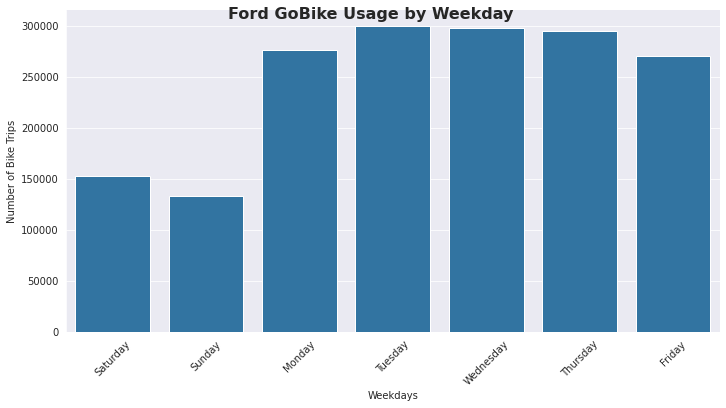

In [159]:
# Weekday usage of the Ford Go bike system
weekday = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plot_02 = sb.catplot(data=df_cleaned, x='start_time_day', kind='count', color = color,aspect=2,order=weekday)

plot_02.set_axis_labels('Weekdays', 'Number of Bike Trips')

plot_02.fig.suptitle('Ford GoBike Usage by Weekday', fontsize=16, fontweight='bold',y=1.05);

plot_02.set_xticklabels(rotation=45);

##### Observation 2: Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

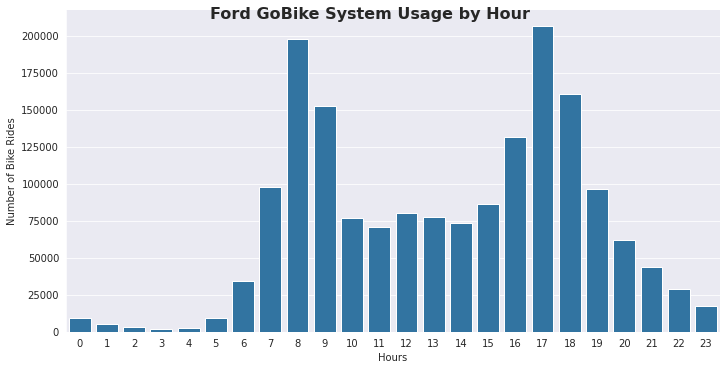

In [160]:
# Hourly usage of the Ford Go Bike System
data=pd.DataFrame(df_cleaned['start_time'].dt.hour)
graph = sb.catplot(data=data,x='start_time', kind='count', color = color, aspect = 2)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', fontsize=16, fontweight='bold',y=1.05);

##### Observation 3: The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters. 

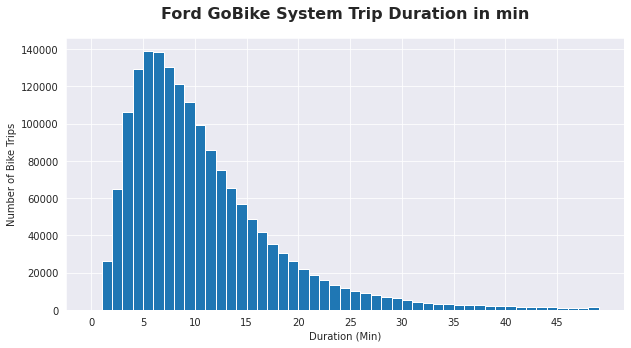

In [161]:
# Duration of the bike rides - in min
bin_edges = np.arange(0, 50, 1)
ticks = list(np.arange(0,50,5))
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=(10,5))
plt.hist(x = df_cleaned.duration_min, bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in min", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');
plt.xticks(ticks, labels);

##### Observation 4: the average bike trip around 8-12 minutes which is normal as the usual person use bikes for short distance trips. 

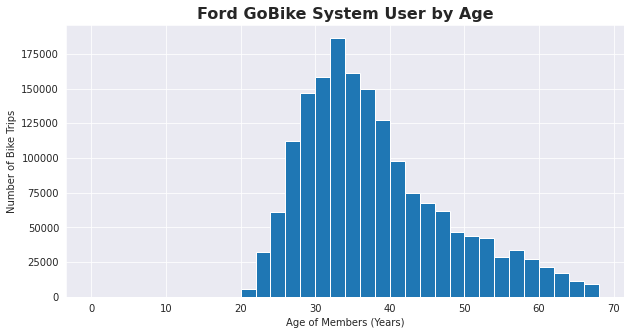

In [162]:
# Age
bin_edges = np.arange(0, 70, 2)
plt.figure(figsize=(10,5))
plt.hist(data = df_cleaned, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike System User by Age", fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

##### Observation 5: The mean age of a user is 37 years old. As a reminder, in the cleaning portion of this data set all users under the age of 68 were removed. The histogram shows the majority of users fall between the ages of 25 - 40 years, which is also the same age range of working adults. 

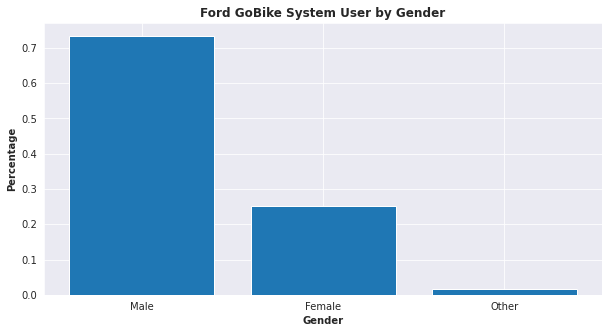

In [163]:
plt.figure(figsize=(10,5))
plt.title('Ford GoBike System User by Gender', fontweight='bold')
plt.xlabel('Gender',fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.bar(x=df_cleaned.member_gender.value_counts().keys(),height=df_cleaned.member_gender.value_counts(normalize=True).values);




##### Observation 6: The visual above demonstrates the overwhelming majority of users of the bike share system are male, representing 73.3% of the total users. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thankfully, due to thorough cleaning efforts there were no big surprises during the exploratory and visualization phase.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there was unusual numbers in biker age ranges as it excedes 140 years old which isn't normal but i eliminated the unusual ranges, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [164]:
# Customers vs Subscribers
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

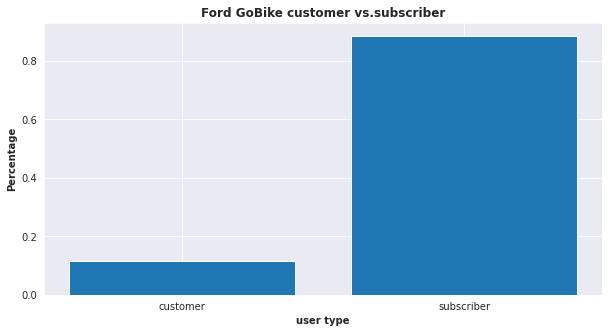

In [165]:
plt.figure(figsize=(10,5))
plt.title('Ford GoBike customer vs.subscriber', fontweight='bold')
plt.xlabel('user type',fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.bar(x=['customer','subscriber'],height=[customer_prop,subscriber_prop]);

##### Observation 1: The majority of users for the Ford Go Bike System are Subscribers i.e. customers who subscribe to the monthly membership. Customers pay by trip .

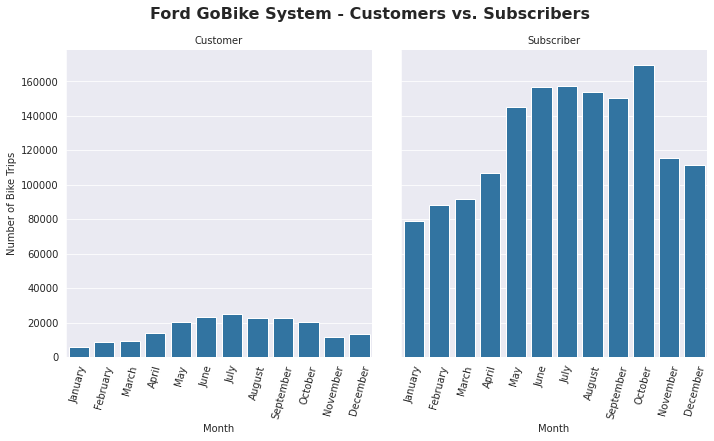

In [166]:
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = True, color = color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observation 2: Winter months are the worst for the bike sharing system for both groups what can be determined by the bad weather. 
##### Customers: demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who visit the Bay Area. 
##### Subscribers: the highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders using the bikes for their daily commute.

In [167]:
df_cleaned_user_week =df_cleaned.groupby(['start_time_day', 'user_type']).size().reset_index()
df_cleaned_user_week

,start_time_day,user_type,0
0,Friday,Customer,30104
1,Friday,Subscriber,240307
2,Monday,Customer,24545
3,Monday,Subscriber,251726
4,Saturday,Customer,34639
5,Saturday,Subscriber,117811
6,Sunday,Customer,29482
7,Sunday,Subscriber,103872
8,Thursday,Customer,28068
9,Thursday,Subscriber,266773


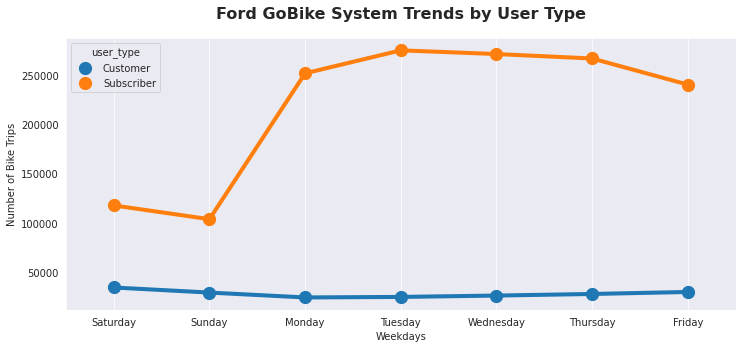

In [168]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))
sb.pointplot(data=df_cleaned_user_week, x='start_time_day', y=0, hue = 'user_type', scale=1.5, order = weekday);
plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

##### Observation 3: The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

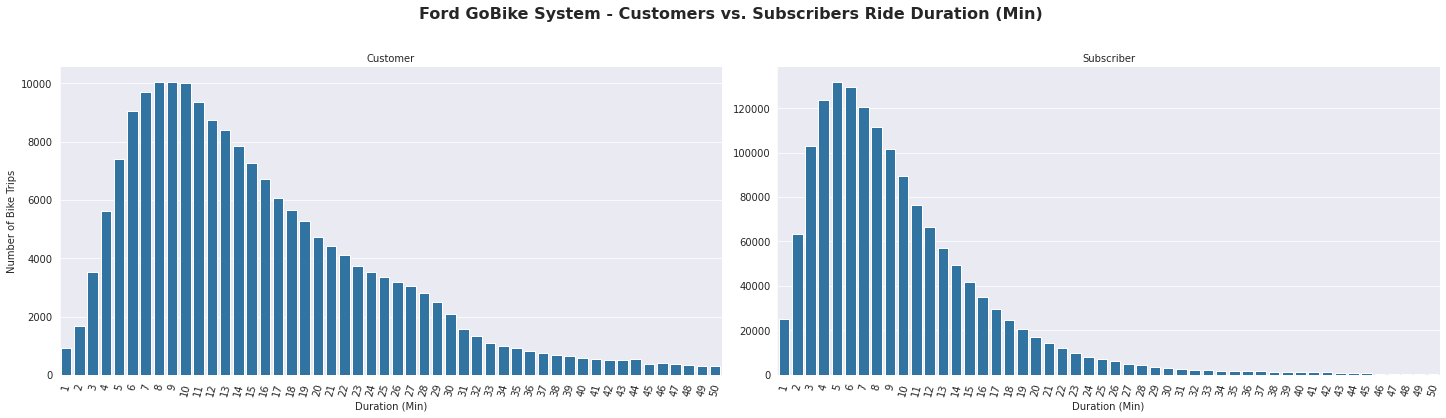

In [169]:
# Customer Usage by Duration vs. Subscriber Usage by Duration



graph = sb.catplot(data=df_cleaned.query('duration_min<=50'), x = 'duration_min', col='user_type', kind='count', sharey = False, color = color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.1,fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

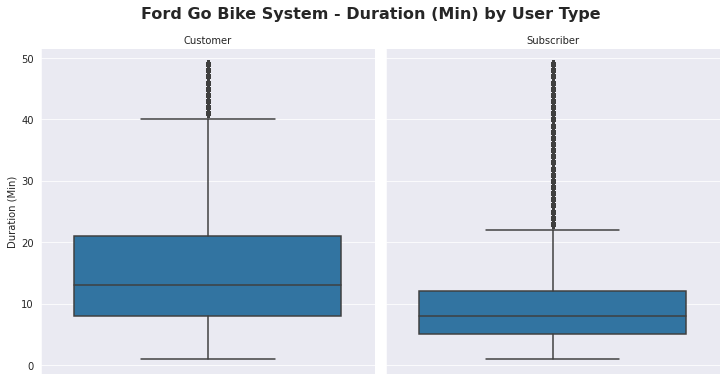

In [170]:
data = df_cleaned.query('duration_min < 50')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = color)

g.set_titles('{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

##### Observation 4: The plots above show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 22 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

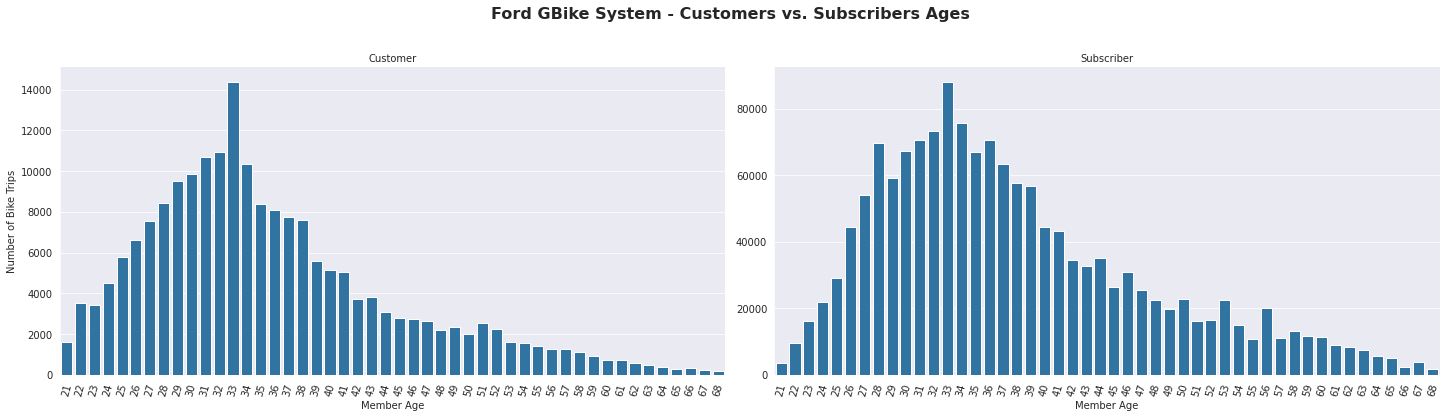

In [171]:
# Customer vs. Subscriber Usage by Age
graph = sb.catplot(data = df_cleaned, x = 'member_age', col='user_type', kind='count', sharey = False, color = color, height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GBike System - Customers vs. Subscribers Ages', y=1.1, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observation 5: (Note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Both user type graphs show the high number of 33 year olds falling withing both catgoires. Subscribers have a wider range of ages while Customers tends to have mostly younger users (most are und the 33 threshold) while the Subscriber user group is more spread out between varying ages with plenty of users in their mid-fifities. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter duration. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 0.98, 'Ford GoBike System - Trip Duration (Min) Per User Type and Gender')

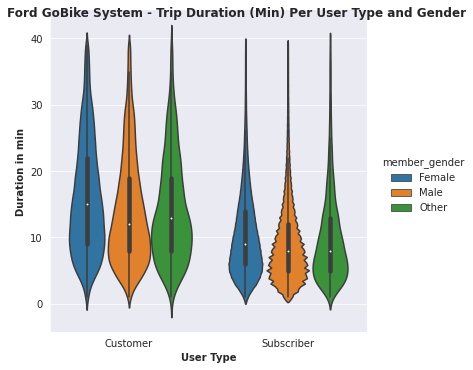

In [172]:

g = sb.catplot(data = df_cleaned.query('duration_min<40'),x='user_type' , y='duration_min', hue = 'member_gender',kind="violin")
g.set_xlabels('User Type',fontweight='bold')
g.set_ylabels('Duration in min',fontweight='bold')
g.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender',fontweight='bold')


##### Observation 1: In both cases, females take longer trips (measured in time) than males and other genders. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (~18 min for males and other vs ~23 for females).

In [173]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725138 entries, 0 to 1863719
Data columns (total 26 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        int64         
 14  member_gender            category      
 15  bike_share_for_all_trip  category      
 16  member_age               int64         
 17  start_time_month         ob

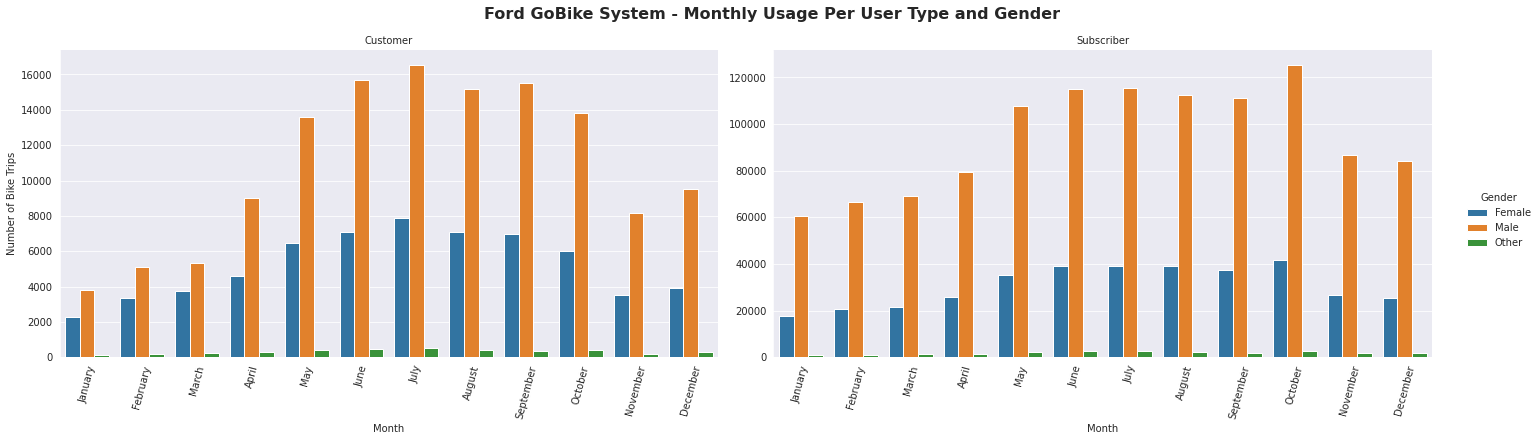

In [174]:
# Monthly usage - user type and gender
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - Monthly Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observation 2:  (Note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). The trend for males and females is very similar for customers, the highest demand is around summertime, reaching its peak in July. For subscribers, the highest demand is from May until October, reaching it's peak in October. Suprisingly, there is a significant number of female Customers using the system between January and March, coming close to the numbers of to male Customers - the ratio is much smaller for the rest of the year.

In [175]:
ages=lambda x:'< 20' if x<=20 else '21 - 30' if 30>=x>20 else '31 - 40' if 40>=x>30 else '41 - 50' if 50>=x>40 else '51 - 60' if 60>=x>50 else '61 - 70' if 70>=x>60 else x
df_cleaned['age_ranges']=df_cleaned.member_age.apply(ages)

In [176]:
df_cleaned.age_ranges.value_counts()

31 - 40    755662
21 - 30    435482
41 - 50    324132
51 - 60    162954
61 - 70     46908
Name: age_ranges, dtype: int64

In [177]:
age_ranges = df_cleaned.groupby(['user_type','start_time_month', 'age_ranges']).agg({'bike_id':'count'}).reset_index()
age_ranges

,user_type,start_time_month,age_ranges,bike_id
0,Customer,April,21 - 30,3781
1,Customer,April,31 - 40,6443
2,Customer,April,41 - 50,2397
3,Customer,April,51 - 60,1045
4,Customer,April,61 - 70,270
...,...,...,...,...
115,Subscriber,September,21 - 30,41592
116,Subscriber,September,31 - 40,64058
117,Subscriber,September,41 - 50,27876
118,Subscriber,September,51 - 60,13139


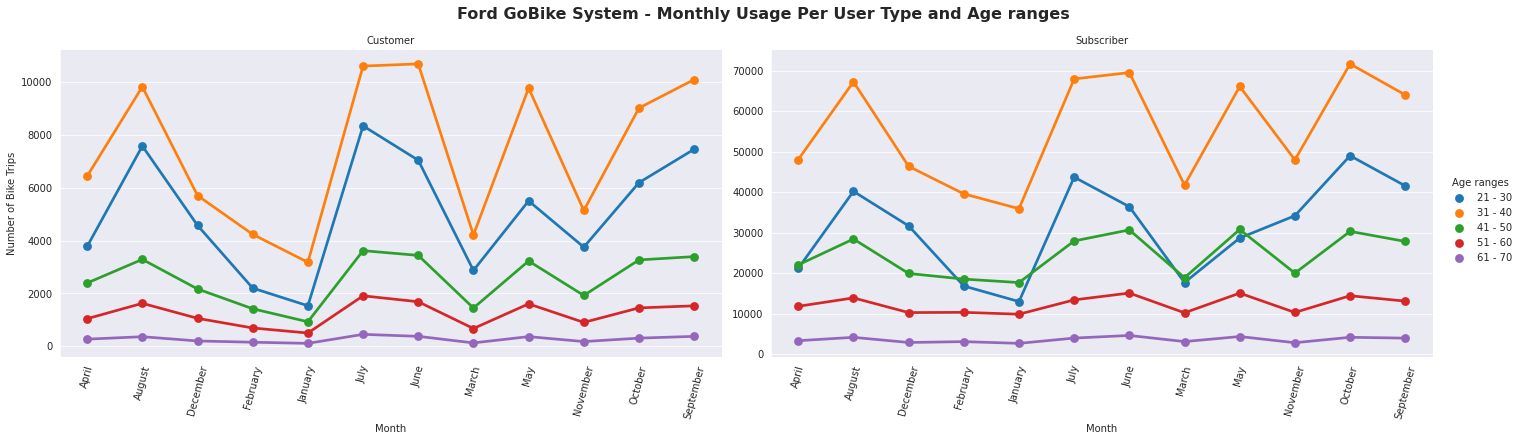

In [178]:
g = sb.catplot(data =age_ranges, x="start_time_month",y='bike_id',hue='age_ranges',col='user_type',kind="point",sharey=False,aspect=2)
g.set_xticklabels(rotation=75);
g.set_axis_labels("Month", "Number of Bike Trips")

g._legend.set_title('Age ranges')
g.set_titles("{col_name}")

g.fig.suptitle('Ford GoBike System - Monthly Usage Per User Type and Age ranges', y=1.05, fontsize=16, fontweight='bold');

##### Observation 3: Subscribers who fall in the age group between 31-40 years old are the most common age group to use the bike sharing system. The 31-40 years old also lead the spike which occurs across all age groups in October. Subscribers who fall in the 21-30 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend at the 41-50 year olds. The oldest age group, the 51-70 years  have the lowest bike rides in the two groups with very few rides (comparative to the entire dataset).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section essentially amplified the previous data topics of exploration through different visuals and adding in more variables to compare to other variables. Subscriber vs Customer age was expanded upon through the use of age groups, and a pointplot to demonstrate the varing habits of each age group.

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here. It was interesting to note the sharp monthly difference for males vs. females vs. other, and how close the female count got to the male Customer count in January through March. This may be a potential loss of possible Customers converting to Subscribers. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## Sources

- [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) documentation
- [Matplotlib histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) documentation
- [Seaborn](https://seaborn.pydata.org) documentation
- [pandas](https://pandas.pydata.org) documentation